In [1]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive',  force_remount=False)

%cd /content/gdrive/MyDrive/FinalThesis/Final_Data/

Mounted at /content/gdrive
/content/gdrive/MyDrive/FinalThesis/Final_Data


In [2]:
# Import necessary libraries for data analysis and visualization

# NumPy for numerical computations
import numpy as np

# Pandas for data manipulation and analysis
import pandas as pd

# Seaborn for statistical data visualization
import seaborn as sns

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

In [3]:
plt.figure(figsize=(10, 15))

<Figure size 1000x1500 with 0 Axes>

<Figure size 1000x1500 with 0 Axes>

In [4]:
tweets_data= pd.read_csv("Bitcoin_tweets.csv", engine='python')

In [5]:
clean_data= pd.read_csv("clean_data_20-01-2024.csv", engine='python')

In [6]:
tweets_data.dtypes

user_name            object
user_location        object
user_description     object
user_created        float64
user_followers        int64
user_friends          int64
user_favourites       int64
user_verified          bool
date                float64
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [7]:
tweets_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",39929.836910,8534,7605,4838,False,44237.999352,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,43755.841782,6769,1532,25483,False,44237.999167,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",41953.451817,128,332,924,False,44237.996389,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,43736.700139,625,129,14,False,44237.996215,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,42403.552720,1249,1472,10482,False,44237.995903,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [8]:
tweets_data.shape

(1048570, 13)

In [9]:
tweets_data.isnull().sum()

user_name               20
user_location       488898
user_description    117322
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
date                     0
text                     0
hashtags             16794
source                3354
is_retweet              40
dtype: int64

In [10]:
user_name = tweets_data['user_name'].unique()

In [11]:
len(user_name)

199681

In [12]:
len(tweets_data['user_name'])

1048570

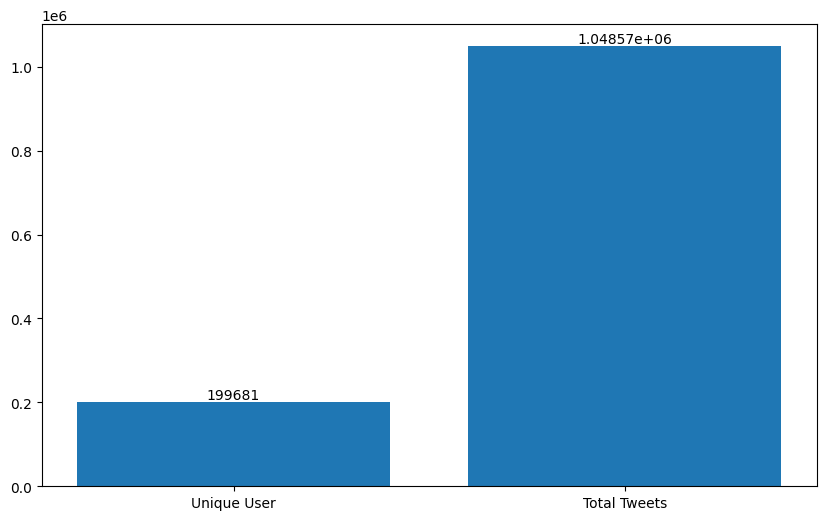

In [13]:
y = [len(user_name), len(tweets_data['text'])]
x = ["Unique User", "Total Tweets"]

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x,y)
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

In [14]:
#sns.countplot(tweets_data, x="is_retweet")

In [15]:
#tweets_data['source'] = tweets_data['source'].astype('string')

In [16]:
tweets_data.dtypes

user_name            object
user_location        object
user_description     object
user_created        float64
user_followers        int64
user_friends          int64
user_favourites       int64
user_verified          bool
date                float64
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

<Axes: ylabel='source'>

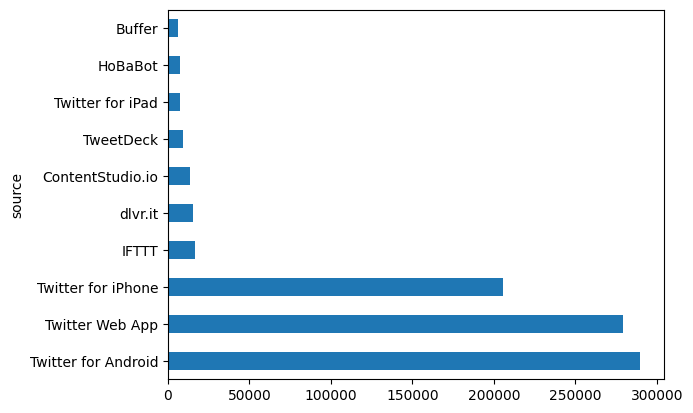

In [17]:
tweets_data['source'].value_counts()[:10].plot(kind='barh')

<Axes: ylabel='user_location'>

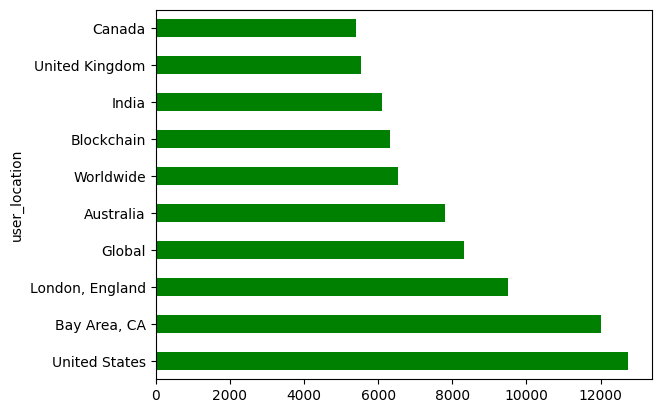

In [18]:
tweets_data['user_location'].value_counts()[:10].plot(kind='barh', color = 'green')

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
clean_data.head(10)

,date_time,clean_text
0,2021-02-10 23:59:04,blue ridge bank shares halted nyse bitcoin atm...
1,2021-02-10 23:58:48,today thats thursday take friend btc wallet se...
2,2021-02-10 23:54:48,guys evening read article btc would like share
3,2021-02-10 23:54:33,btc big chance billion price bitcoin fx btc cr...
4,2021-02-10 23:54:06,network secured nodes today soon biggest bears...
5,2021-02-10 23:53:29,trade crypto binance enjoy cashback trading fe...
6,2021-02-10 23:53:16,ltfire amp mangt bitcoin crypto btc
7,2021-02-10 23:52:42,prices update eur btc eth xrp
8,2021-02-10 23:52:25,btc bitcoin ethereum eth crypto cryptotrading ...
9,2021-02-10 23:52:07,bitcoin investment revolutionary crypto firms...


In [21]:
clean_data['clean_text'].fillna("", inplace=True)
all_text = " ".join(title for title in clean_data['clean_text'])

stopwords = set(STOPWORDS)
stopwords.update(["btc", "bitcoin", "crypto", "cryptocurrency"])

wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, background_color="white").generate(all_text)

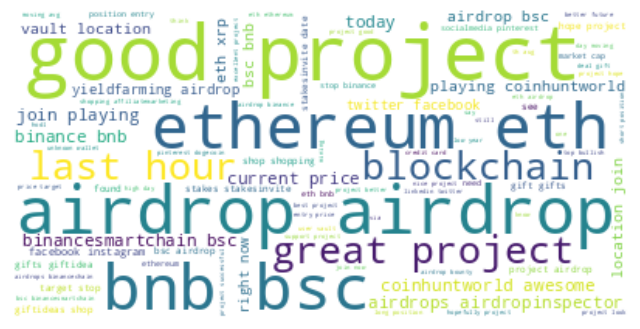

In [22]:
# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
#plt.title("Word Cloud of Tweets", fontsize=16)
plt.show()

In [23]:
u_tweets_data = tweets_data.drop_duplicates(subset=['user_name'])

In [24]:
len(u_tweets_data)

199681

In [25]:
u_tweets_data['user_created'] =  pd.to_datetime(u_tweets_data['user_created'], unit='d', origin='1899-12-30')

<ipython-input-25-bbddfb36c4f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_tweets_data['user_created'] =  pd.to_datetime(u_tweets_data['user_created'], unit='d', origin='1899-12-30')


In [26]:
u_tweets_data['user_created_year'] = u_tweets_data['user_created'].dt.year

<ipython-input-26-c3380e48be80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_tweets_data['user_created_year'] = u_tweets_data['user_created'].dt.year


In [27]:
u_tweets_data['user_created_mnth'] = u_tweets_data['user_created'].dt.month

<ipython-input-27-cdf8661c80d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_tweets_data['user_created_mnth'] = u_tweets_data['user_created'].dt.month


In [28]:
u_tweets_data = u_tweets_data[u_tweets_data['user_created_year'] >= 2006]

In [29]:
u_tweets_data['user_created_year'].unique()

array([2009, 2019, 2014, 2016, 2010, 2018, 2020, 2017, 2011, 2012, 2015,
       2021, 2008, 2013, 2007, 2006], dtype=int32)

<Axes: xlabel='user_created_year'>

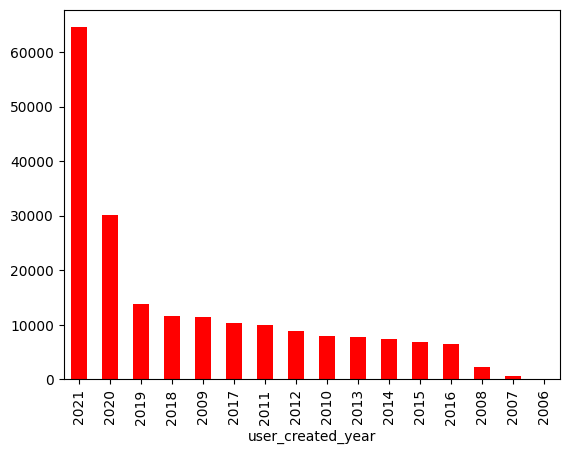

In [30]:
u_tweets_data['user_created_year'].value_counts().plot(kind='bar', color = 'red')

<Axes: xlabel='user_created_mnth'>

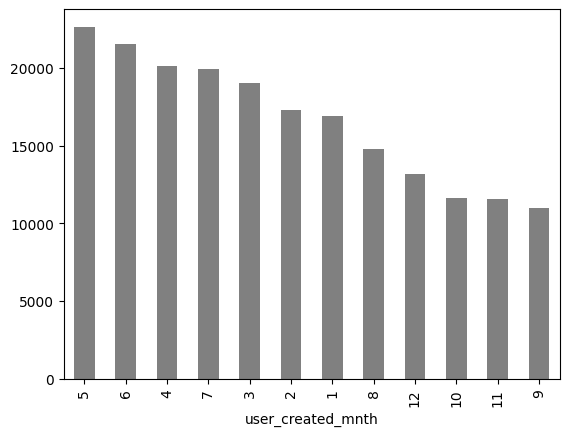

In [31]:
u_tweets_data['user_created_mnth'].value_counts().plot(kind='bar', color = 'grey')

In [32]:
sum(u_tweets_data['user_followers']) / len(u_tweets_data)

3579.208751089254

In [33]:
sum(u_tweets_data['user_friends']) / len(u_tweets_data)

783.9319854966496

In [34]:
u_tweets_data['user_verified'].value_counts()

user_verified
False    197626
True       2052
Name: count, dtype: int64

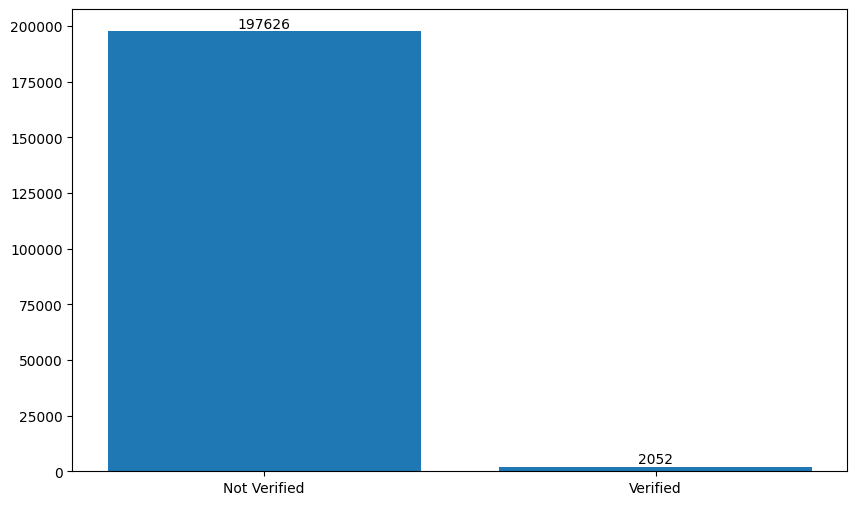

In [35]:
y = [197626, 2052]
x = ["Not Verified", "Verified"]

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x,y)
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()